# 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로 고민이 많다. 현재까지 진행된 결혼식에 대한 결혼식 참석 인원과 그 중에서 식사를 하는 인원의 데이터가 제공될 때, 아래 각 문항에 대한 코드를 작성하시오

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1) QuizData.csv 파일로부터 데이터를 읽어와서 결혼식 참석 인원(total) 식수 인원(reception)을 각각의 변수로 저장하시오

In [2]:
df = pd.read_csv('/content/QuizData.csv')
df.head()

,total,reception
0,118,62
1,253,148
2,320,201
3,94,80
4,155,92


In [3]:
# feature는 2차원 배열이어야!
X = df.iloc[:,:-1].values
X

array([[118],
       [253],
       [320],
       [ 94],
       [155],
       [188],
       [201],
       [338],
       [186],
       [183],
       [223],
       [392],
       [ 86],
       [112],
       [129],
       [223],
       [288],
       [262],
       [143],
       [179]])

In [4]:
y = df.iloc[:,-1].values
y

array([ 62, 148, 201,  80,  92, 131, 147, 187, 124, 152, 143, 199,  58,
        68,  76, 149, 152, 183,  88, 101])

In [6]:
# 75:25비율로 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# 훈련 세트를 이용하여 단순 선형 회귀(LinearRegression) 모델 생성하시오

In [7]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression()
leg.fit(X_train, y_train)

LinearRegression()

In [8]:
leg.predict(X_test)

array([ 97.15735792, 153.04756918, 115.44869979, 119.00534959,
       137.80478429])

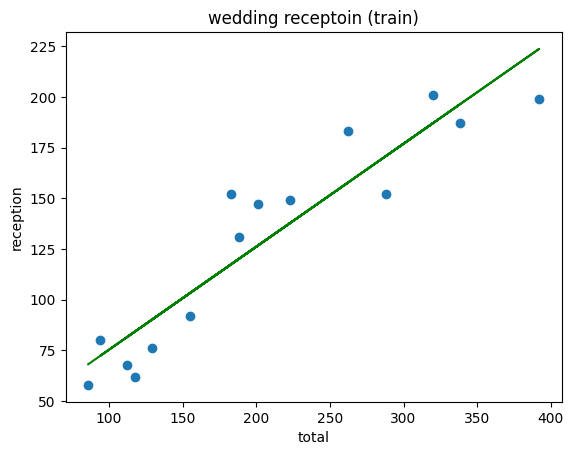

In [12]:
# 훈련 세트에 대한 시각화
plt.scatter(X_train, y_train)
plt.plot(X_train, leg.predict(X_train), color='green')
plt.xlabel('total')
plt.ylabel('reception')
plt.title('wedding receptoin (train)')
plt.show()

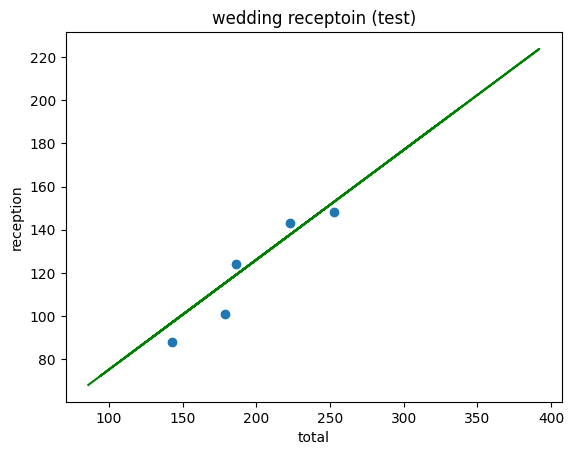

In [17]:
# 테스트 세트 시각화
plt.scatter(X_test, y_test)
plt.plot(X_train, leg.predict(X_train), color='green')
# 이 줄은 그대로 둬도됨. 훈련세트로 모델 만들었기 때문
# 둘다 test로 바꿔줘도 결과는 똑같은데 그래프 범위가 잘림(데이터 범위때문에)
# 결과가 똑같은이유 : 초록선 = 모델이 예측한 값
# 뭘 넣어서 예측하든 어차피 초록선 위에 찍힘 > 이으면 초록선이 나옴

plt.xlabel('total')
plt.ylabel('reception')
plt.title('wedding receptoin (test)')
plt.show()

# 훈련, 테스트 세트에 대해 각각 모델 평가 점수

In [18]:
leg.score(X_train, y_train)

0.8707088403321211

In [19]:
leg.score(X_test, y_test)

0.8634953212566615

# 결혼식 참석 인원이 300명 일 때 예상되는 식수 인원은?

In [20]:
leg.predict([[300]])

array([176.92793218])

In [ ]:
# 약 177명
# np.around해줘도됨 .astype(int)